<h3 align=center>TEST 2</h3>

**Pregunta:** *3*

**Alumna:** *Cynthia Lizeth Calixtro Ames*

**Codigo:** *20150456D*

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Cargando la data
data = pd.read_csv("bodyfat.csv")
data.drop(['Density',], axis=1, inplace =True)
data.head()

,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [2]:
# ============= Definiendo los features y el target =============
print('Definiendo la data...')

x = data.drop(['bodyfat'], axis=1) # features
Y = data['bodyfat'] # target

m = len(Y)
n = x.shape[1]

print("Cantidad de ejemplos: ", m)
print("Cantidad de features: ", n)
print("Features (del x{0} al x{1}): ".format(1,n))
print(x.columns)

# ============= Dividiendo la data en 30% para las pruebas =============
print('\nDividiendo la data...')

from sklearn.model_selection import train_test_split

x_train, x_test, Y_train, Y_test = train_test_split(x, Y, 
                                                    test_size = 0.3, # 30%
                                                    random_state=5 # seed
                                                   )

print('Cantidad de ejemplos para el entrenamiento: ',x_train.shape[0])
print('Cantidad de ejemplos para la prueba: ',x_test.shape[0])


# ============= Ajustando el modelo de Regresion Lineal a los datos (full Linear Regression) =============
print('\nAjustando el modelo a los datos...')

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, Y_train)

# Recta obtenida
print("\nLa recta obtenida de la regresion lineal es de la forma:")
from sympy import Symbol
eq_recta = 'y = ' + str(round(model.intercept_,8))+' + '
feature_cont = 0
for i in range(x.shape[1]):
    # feature
    x_i = 'x'+str(i+1)
    # contribucion de cada feature
    feature_cont = feature_cont +round(model.coef_[i],8)*Symbol(x_i)   
eq_recta = eq_recta + str(feature_cont)
print(eq_recta)

# Veamos que tan bien se ha ajustado a la data
print('\nR-Squared: %.4f' % model.score(x_test,Y_test))

# Calculando la funcion de costo
from sklearn.metrics import mean_squared_error

# Prediciendo valores de bodyfat para el conjunto de prueba
bodyfat_pred = model.predict(x_test)

mse = mean_squared_error(Y_test, bodyfat_pred)
print('MSE: ',mse)

Definiendo la data...
Cantidad de ejemplos:  252
Cantidad de features:  13
Features (del x1 al x13): 
Index(['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh',
       'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'],
      dtype='object')

Dividiendo la data...
Cantidad de ejemplos para el entrenamiento:  176
Cantidad de ejemplos para la prueba:  76

Ajustando el modelo a los datos...

La recta obtenida de la regresion lineal es de la forma:
y = -30.70260602 + 0.023309*x1 + 0.33653582*x10 + 0.22411411*x11 + 0.56906145*x12 - 1.5109583*x13 - 0.1585064*x2 - 0.0516509*x3 - 0.47017568*x4 - 0.0158513*x5 + 1.06362026*x6 - 0.15901309*x7 + 0.1923428*x8 + 0.0673744*x9

R-Squared: 0.7233
MSE:  17.426142960164476


### Diagnostico de regresion: Probando los supuestos de Regresion Lineal

In [3]:
residuals = Y_test - bodyfat_pred

#### 1) Linealidad e igual varianza de los errores

Text(0.5, 1.0, 'Residuos VS Prediccion de bodyfat')

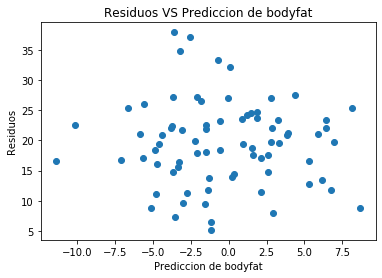

In [4]:
plt.scatter(residuals,bodyfat_pred)
plt.xlabel("Prediccion de bodyfat")
plt.ylabel("Residuos")
plt.title("Residuos VS Prediccion de bodyfat")

#### 2) Normalidad

Aplicamos la *normal probability plot* para evaluar como los residuos se apartan visualmente de la normalidad.

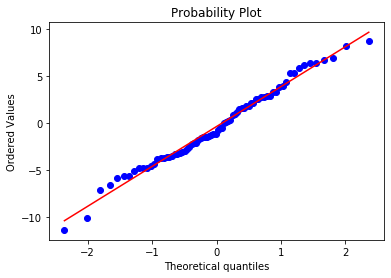

In [5]:
import numpy as np
from scipy import stats
res = stats.probplot(residuals, plot=plt)

#### Correlacion: Trabajamos con aquellas columnas que esten altamente correlacionadas con el target ('bodyfat')

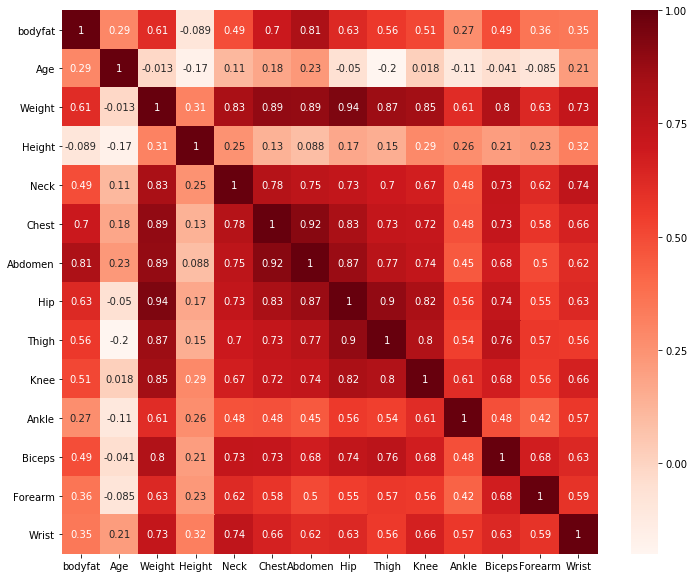

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True, cmap=plt.cm.Reds)
plt.show()

In [7]:
# Correlacion con el target
corr_target = abs(data.corr()["bodyfat"])

# Seleccionando features altamente correlacionados
features_relevantes = corr_target[corr_target>0.5]
features_relevantes

bodyfat    1.000000
Weight     0.612414
Chest      0.702620
Abdomen    0.813432
Hip        0.625201
Thigh      0.559608
Knee       0.508665
Name: bodyfat, dtype: float64

In [8]:
# Entonces debemos trabajar solo con los features relevantes
data_new = data[features_relevantes.index]
data_new.head()

,bodyfat,Weight,Chest,Abdomen,Hip,Thigh,Knee
0,12.3,154.25,93.1,85.2,94.5,59.0,37.3
1,6.1,173.25,93.6,83.0,98.7,58.7,37.3
2,25.3,154.00,95.8,87.9,99.2,59.6,38.9
3,10.4,184.75,101.8,86.4,101.2,60.1,37.3
4,28.7,184.25,97.3,100.0,101.9,63.2,42.2


#### Correlacion: Eliminamos las columnas que esten altamente correlacionadas entre ellas

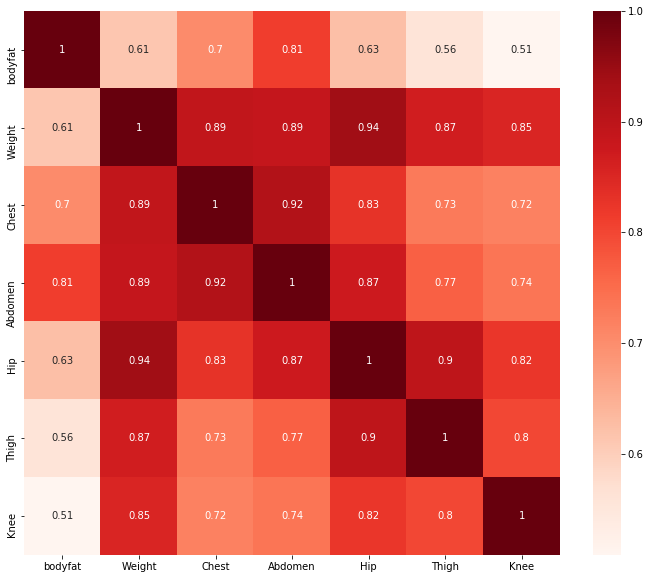

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(data_new.corr(),annot=True, cmap=plt.cm.Reds)
plt.show()

Del grafico anterior observamos que todas las columnas de nuestro nuevo dataset estan altamente correlacionadas entre ellas. Entonces, eliminamos todas las columnas excepto por aquella que tenga mayor valor de correlacion con el target. En otras palabras solo trabajaremos con el feature `Abdomen`.

In [10]:
# ============= Definiendo los features y el target =============
print('Definiendo la data...')

feature_name= 'Abdomen'
x = data[feature_name][0:m, np.newaxis] # features
Y = data['bodyfat'] # target

m = len(Y)
n = 1

print("Cantidad de ejemplos: ", m)
print("Cantidad de features: ", n)
print("Features: ",feature_name)

# ============= Dividiendo la data en 30% para las pruebas =============
print('\nDividiendo la data...')

from sklearn.model_selection import train_test_split

x_train, x_test, Y_train, Y_test = train_test_split(x, Y, 
                                                    test_size = 0.3, # 30%
                                                    random_state=5 # seed
                                                   )

print('Cantidad de ejemplos para el entrenamiento: ',x_train.shape[0])
print('Cantidad de ejemplos para la prueba: ',x_test.shape[0])


# ============= Ajustando el modelo de Regresion Lineal a los datos =============
print('\nAjustando el modelo a los datos...')

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, Y_train)

# Recta obtenida
print("\nLa recta obtenida de la regresion lineal es de la forma:")
from sympy import Symbol
eq_recta = 'y = ' + str(round(model.intercept_,8))+' + '
feature_cont = 0
for i in range(x.shape[1]):
    # feature
    x_i = 'x'+str(i+1)
    # contribucion de cada feature
    feature_cont = feature_cont +round(model.coef_[i],8)*Symbol(x_i)   
eq_recta = eq_recta + str(feature_cont)
print(eq_recta)

# Veamos que tan bien se ha ajustado a la data
print('\nR-Squared: %.4f' % model.score(x_test,Y_test))

# Calculando la funcion de costo
from sklearn.metrics import mean_squared_error

# Prediciendo valores de bodyfat para el conjunto de prueba
bodyfat_pred = model.predict(x_test)

mse = mean_squared_error(Y_test, bodyfat_pred)
print('MSE: ',mse)

Definiendo la data...
Cantidad de ejemplos:  252
Cantidad de features:  1
Features:  Abdomen

Dividiendo la data...
Cantidad de ejemplos para el entrenamiento:  176
Cantidad de ejemplos para la prueba:  76

Ajustando el modelo a los datos...

La recta obtenida de la regresion lineal es de la forma:
y = -39.53806605 + 0.63620907*x1

R-Squared: 0.7237
MSE:  17.39982934672714


Este ultimo modelo presenta un R-squared mas alto y un MSE mas bajo que el modelo *full multiple linear regression* aplicado al inicio.